In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib import cm
import fastf1 as ff1
from fastf1.core import Laps
from fastf1 import utils
from fastf1 import plotting
plotting.setup_mpl()
from timple.timedelta import strftimedelta

In [3]:
ff1.Cache.enable_cache('C:\code\python/2022_season_analysis_CODES')

QUALIFYING


In [4]:
saudi_quali = ff1.get_session(2022, 'Saudi Arabia', 'Q')
print(saudi_quali.date)

2022-03-26 20:00:00


In [5]:
saudi_quali.load();
saudi_quali_laps = saudi_quali.laps

core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6', '22']


In [6]:
saudi_quali.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,1.0,0.0,0 days 00:01:29.705000,0 days 00:01:28.924000,0 days 00:01:28.200000,NaT,,0.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,2.0,0.0,0 days 00:01:29.039000,0 days 00:01:28.780000,0 days 00:01:28.225000,NaT,,0.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,3.0,0.0,0 days 00:01:28.855000,0 days 00:01:28.686000,0 days 00:01:28.402000,NaT,,0.0
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,4.0,0.0,0 days 00:01:28.928000,0 days 00:01:28.945000,0 days 00:01:28.461000,NaT,,0.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,5.0,0.0,0 days 00:01:30.093000,0 days 00:01:29.584000,0 days 00:01:29.068000,NaT,,0.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,6.0,0.0,0 days 00:01:29.680000,0 days 00:01:29.618000,0 days 00:01:29.104000,NaT,,0.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,7.0,0.0,0 days 00:01:29.978000,0 days 00:01:29.295000,0 days 00:01:29.147000,NaT,,0.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,8.0,0.0,0 days 00:01:29.683000,0 days 00:01:29.404000,0 days 00:01:29.183000,NaT,,0.0
10,10,P GASLY,GAS,AlphaTauri,4e7c9b,Pierre,Gasly,Pierre Gasly,9.0,0.0,0 days 00:01:29.891000,0 days 00:01:29.418000,0 days 00:01:29.254000,NaT,,0.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,10.0,0.0,0 days 00:01:29.831000,0 days 00:01:29.546000,0 days 00:01:29.588000,NaT,,0.0


Fastest Qualifying Lap:

In [7]:
fastest_quali_lap = saudi_quali_laps.pick_fastest()
fastest_quali_lap

Time                      0 days 02:19:28.320000
DriverNumber                                  11
LapTime                   0 days 00:01:28.200000
LapNumber                                     18
Stint                                          6
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:32.299000
Sector2Time               0 days 00:00:28.323000
Sector3Time               0 days 00:00:27.578000
Sector1SessionTime        0 days 02:18:32.419000
Sector2SessionTime        0 days 02:19:00.742000
Sector3SessionTime        0 days 02:19:28.320000
SpeedI1                                    290.0
SpeedI2                                    329.0
SpeedFL                                    308.0
SpeedST                                    335.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     3.0
FreshTyre           

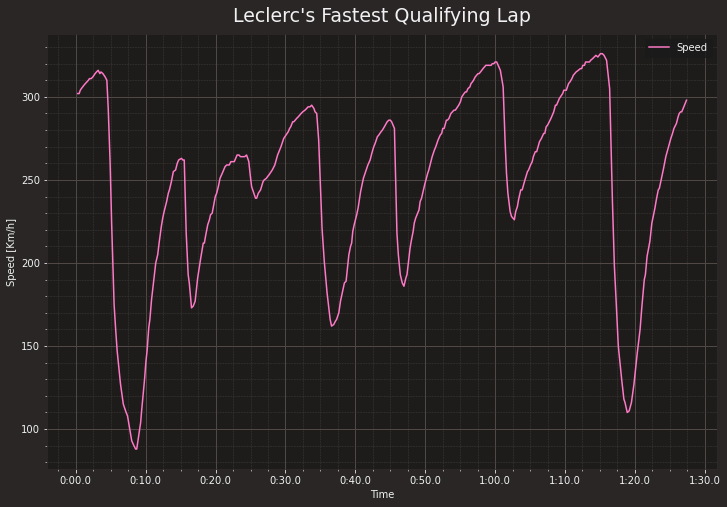

In [8]:
lec_fastest_quali_lap = saudi_quali_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_quali_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Qualifying Lap")
ax.legend()

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:2082: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  super().__init__(*args, **kwargs)


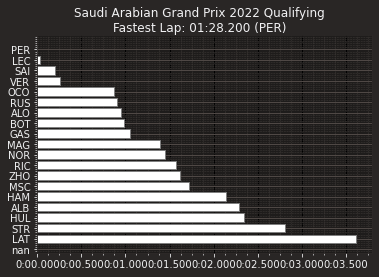

In [9]:
drivers = pd.unique(saudi_quali.laps['Driver'])

list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = saudi_quali.laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']

#team_colors = list()
#for index, lap in fastest_laps.iterlaps():
#   color = ff1.plotting.team_color(lap['Team'])
 #   team_colors.append(color)

fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'],
        color= 'white', edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])

ax.invert_yaxis()

ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')

plt.suptitle(f"{saudi_quali.event['EventName']} {saudi_quali.event.year} Qualifying\n"
             f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")

plt.show()

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6'

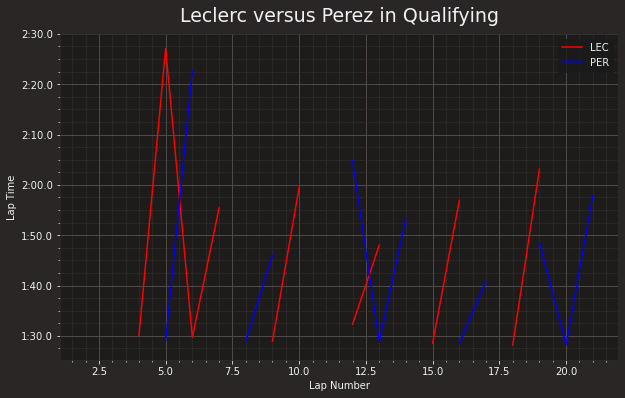

In [10]:
laps = saudi_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('PER')
drv_2 = laps.pick_driver('LEC')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Perez in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'PER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Saudi Arabian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['11', '16', '55', '1', '31', '63', '14', '77', '10', '20', '4', '3', '24', '47', '18', '44', '23', '27', '6'

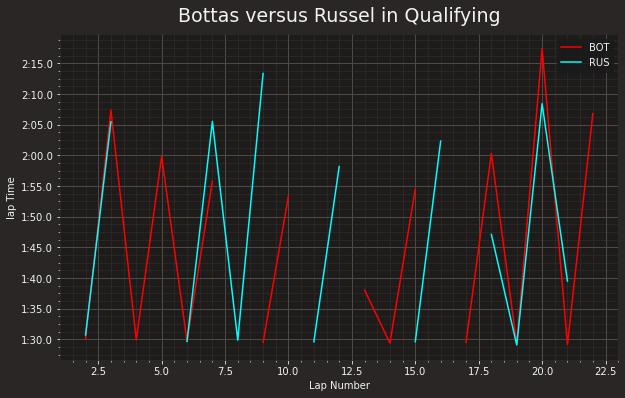

In [11]:
laps = saudi_quali.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('BOT')
drv_2 = laps.pick_driver('RUS')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color = 'red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color = 'cyan')

ax.set_title('Bottas versus Russel in Qualifying')
ax.set_xlabel('Lap Number')
ax.set_ylabel('lap Time')
plt.legend(['BOT', 'RUS'])

RACE

In [12]:
saudi_race = ff1.get_session(2022, 'Bahrain', 'R')
print(saudi_race.date)

2022-03-20 18:00:00


In [13]:
saudi_race.load();
saudi_race_laps = saudi_race.laps
#saudi_race_laps

core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


In [14]:
saudi_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:37:33.584000,Finished,26.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:37:39.182000,Finished,18.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,5.0,NaT,NaT,NaT,0 days 01:37:43.259000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,9.0,NaT,NaT,NaT,0 days 01:37:44.795000,Finished,12.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5.0,7.0,NaT,NaT,NaT,0 days 01:37:48.338000,Finished,10.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,6.0,6.0,NaT,NaT,NaT,0 days 01:37:49.703000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,11.0,NaT,NaT,NaT,0 days 01:37:53.007000,Finished,6.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,8.0,16.0,NaT,NaT,NaT,0 days 01:37:53.970000,Finished,4.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,9.0,8.0,NaT,NaT,NaT,0 days 01:37:55.974000,Finished,2.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,10.0,15.0,NaT,NaT,NaT,0 days 01:37:56.648000,Finished,1.0


In [15]:
fastest_race_lap = saudi_race_laps.pick_fastest()
fastest_race_lap

Time                      0 days 02:30:35.690000
DriverNumber                                  16
LapTime                   0 days 00:01:34.570000
LapNumber                                     51
Stint                                          4
PitOutTime                                   NaT
PitInTime                                    NaT
Sector1Time               0 days 00:00:30.439000
Sector2Time               0 days 00:00:40.732000
Sector3Time               0 days 00:00:23.399000
Sector1SessionTime        0 days 02:29:31.559000
Sector2SessionTime        0 days 02:30:12.291000
Sector3SessionTime        0 days 02:30:35.690000
SpeedI1                                    231.0
SpeedI2                                    261.0
SpeedFL                                    278.0
SpeedST                                    297.0
IsPersonalBest                              True
Compound                                    SOFT
TyreLife                                     8.0
FreshTyre           

In [16]:
saudi_race.results[:10]

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,1.0,1.0,NaT,NaT,NaT,0 days 01:37:33.584000,Finished,26.0
55,55,C SAINZ,SAI,Ferrari,ed1c24,Carlos,Sainz,Carlos Sainz,2.0,3.0,NaT,NaT,NaT,0 days 01:37:39.182000,Finished,18.0
44,44,L HAMILTON,HAM,Mercedes,6cd3bf,Lewis,Hamilton,Lewis Hamilton,3.0,5.0,NaT,NaT,NaT,0 days 01:37:43.259000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,9.0,NaT,NaT,NaT,0 days 01:37:44.795000,Finished,12.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,5.0,7.0,NaT,NaT,NaT,0 days 01:37:48.338000,Finished,10.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,6.0,6.0,NaT,NaT,NaT,0 days 01:37:49.703000,Finished,8.0
31,31,E OCON,OCO,Alpine,2293d1,Esteban,Ocon,Esteban Ocon,7.0,11.0,NaT,NaT,NaT,0 days 01:37:53.007000,Finished,6.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,8.0,16.0,NaT,NaT,NaT,0 days 01:37:53.970000,Finished,4.0
14,14,F ALONSO,ALO,Alpine,2293d1,Fernando,Alonso,Fernando Alonso,9.0,8.0,NaT,NaT,NaT,0 days 01:37:55.974000,Finished,2.0
24,24,G ZHOU,ZHO,Alfa Romeo,b12039,Guanyu,Zhou,Guanyu Zhou,10.0,15.0,NaT,NaT,NaT,0 days 01:37:56.648000,Finished,1.0


c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


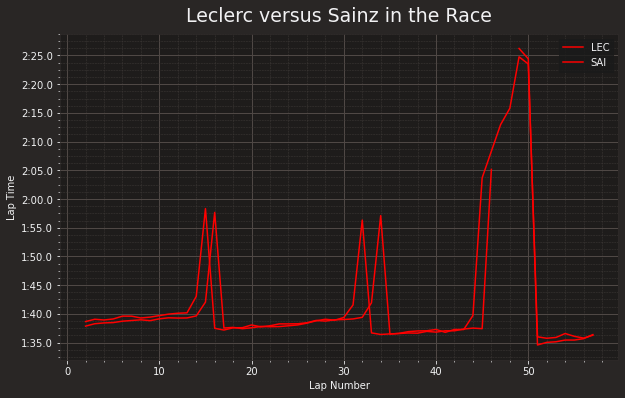

In [17]:
laps = saudi_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('SAI')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='red')
ax.set_title('Leclerc versus Sainz in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'SAI'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


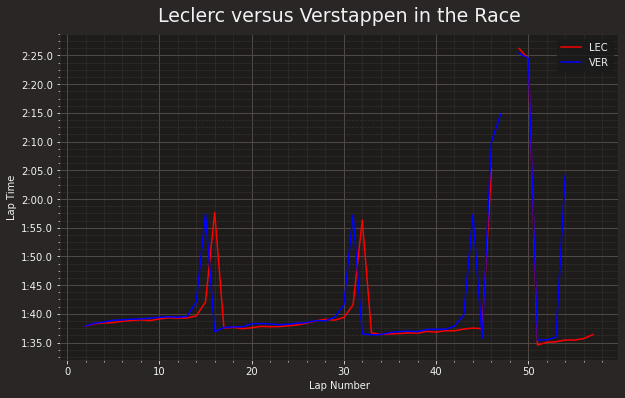

In [18]:
laps = saudi_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('LEC')
drv_2 = laps.pick_driver('VER')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='red')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='blue')
ax.set_title('Leclerc versus Verstappen in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['LEC', 'VER'])

c:\Users\PC\anaconda3\lib\site-packages\fastf1\core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Bahrain Grand Prix - Race [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '55', '44', '63', '20', '77', '31', '22', '14', '24', '47', '18', '23', '3', '4', '6', '27', '11', '1', '10']


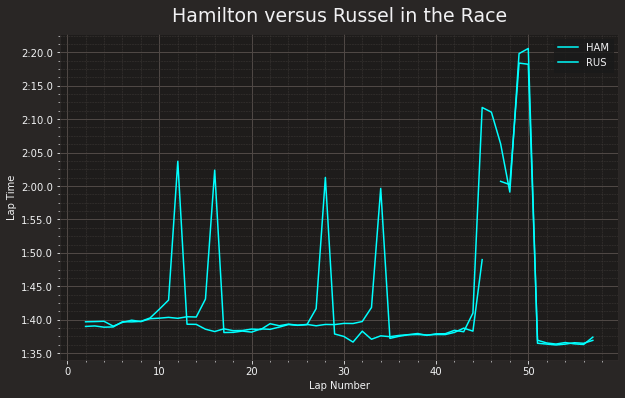

In [19]:
laps = saudi_race.load_laps(with_telemetry=True)
drv_1 = laps.pick_driver('HAM')
drv_2 = laps.pick_driver('RUS')

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(drv_1['LapNumber'], drv_1['LapTime'], color='cyan')
ax.plot(drv_2['LapNumber'], drv_2['LapTime'], color='cyan')
ax.set_title('Hamilton versus Russel in the Race')
ax.set_xlabel('Lap Number')
ax.set_ylabel("Lap Time")
plt.legend(['HAM', 'RUS'])

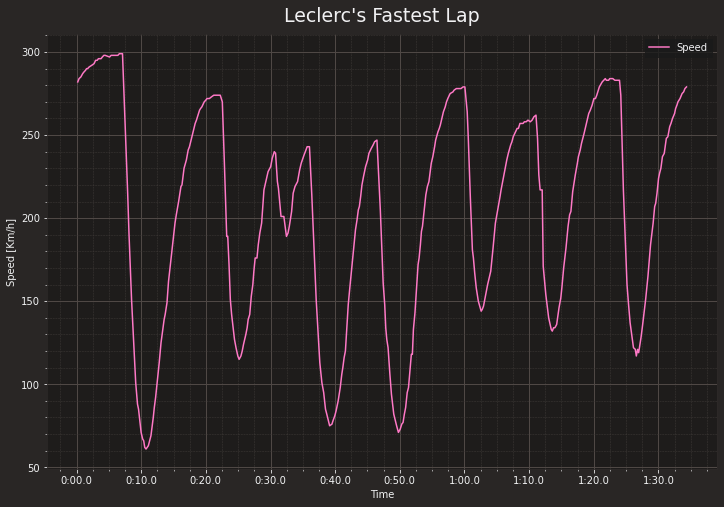

In [20]:
lec_fastest_lap = saudi_race_laps.pick_driver('LEC').pick_fastest()
lec_car_data = lec_fastest_lap.get_car_data()
t = lec_car_data['Time']
velo = lec_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Leclerc's Fastest Lap")
ax.legend()

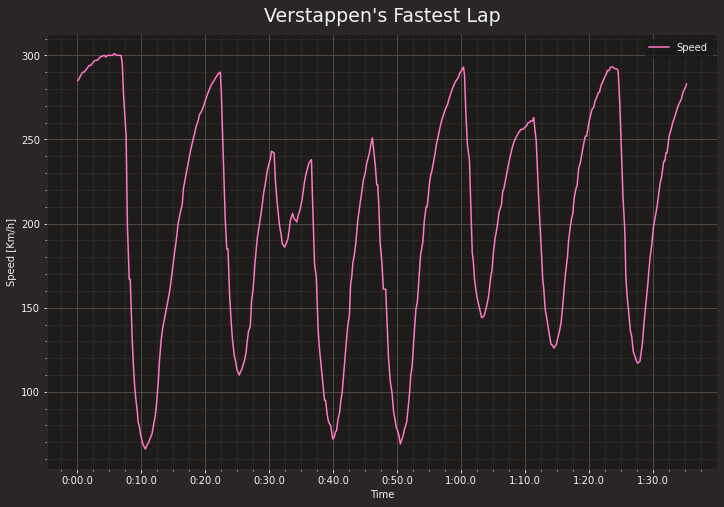

In [21]:
ver_fastest_lap = saudi_race_laps.pick_driver('VER').pick_fastest()
ver_car_data = ver_fastest_lap.get_car_data()
t = ver_car_data['Time']
velo = ver_car_data['Speed']

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(t, velo, label='Speed')
ax.set_xlabel('Time')
ax.set_ylabel('Speed [Km/h]')
ax.set_title("Verstappen's Fastest Lap")
ax.legend()